In [ ]:
import os
# data path for the sherpas study
participants_data_filename = "d:/data_sherpas/ParticipantsDemographics.xlsx"
pelvis_mri_results_path = "d:/data_sherpas/ProcessedCropped/"
lumbar_mri_results_path = "d:/data_sherpas/LumbarSpineReprocessed/"
output_path = "d:/data_sherpas/statistical_analysis/"

# data path for the cto5k study
results_cto5k_filename = "D:/Work/Publications/2025_CoreScore/DataAnalysis/CoreScore/merged_data.csv"
lumbar_mri_cto5k_results_path = "D:/data_cto5k_cyclists/AllData/Reprocessed/"
pelvis_mri_cto5k_results_path = "D:/data_cto5k_cyclists/AllData/ReprocessedCropped/"   

volume_ff_filename_per_subject = "volumes_and_ffs.csv"
muscle_length_mm_filename_per_subject = "muscle_lengths_mm.csv"
column_names_pelvis = ["VOL_LGMAX", "VOL_LGMED", "VOL_LGMIN", "VOL_LTFL", "VOL_RGMAX", "VOL_RGMED", "VOL_RGMIN", "VOL_RTFL",
                "FF_LGMAX", "FF_LGMED", "FF_LGMIN", "FF_LTFL", "FF_RGMAX", "FF_RGMED", "FF_RGMIN", "FF_RTFL"]
column_names_lumbar = ["VOL_LPSOAS", "VOL_LILIACUS", "VOL_LQUADRATUS", "VOL_LM+ES", "VOL_RPSOAS", "VOL_RILIACUS", "VOL_RQUADRATUS", "VOL_RM+ES",
                       "FF_LPSOAS", "FF_LILIACUS", "FF_LQUADRATUS", "FF_LM+ES", "FF_RPSOAS", "FF_RILIACUS", "FF_RQUADRATUS", "FF_RM+ES"]
os.makedirs(output_path, exist_ok=True)

import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import matplotlib.pyplot as plt
import seaborn as sns   
import scipy.stats as stats

# Load the data
data = pd.read_excel(participants_data_filename, sheet_name='Sheet1')


In [ ]:
import glob

# Get all subfolders in pelvis_mri_results_path
subfolders = [f.path for f in os.scandir(pelvis_mri_results_path) if f.is_dir()]
# For each subfolder, match to ID and add volume/ff data
for folder in subfolders:
    folder_name = os.path.basename(folder)
    # Find matching row in data
    idx = data.index[data['Code'] == folder_name]
    if not idx.empty:
        csv_path = os.path.join(folder, volume_ff_filename_per_subject)
        if os.path.exists(csv_path):
            vol_ff_df = pd.read_csv(csv_path, header=None)
            # Assuming single row, add columns to data
            for col in vol_ff_df.columns:
                # Assign values to named columns using column_names_pelvis
                if col > 0 and col <= len(column_names_pelvis):
                    data.loc[idx, column_names_pelvis[col-1]] = vol_ff_df.iloc[0][col]

# Do the same for lumbar results
subfolders = [f.path for f in os.scandir(lumbar_mri_results_path) if f.is_dir()]
# For each subfolder, match to ID and add volume/ff data
for folder in subfolders:
    folder_name = os.path.basename(folder)
    # Find matching row in data
    idx = data.index[data['Code'] == folder_name]
    if not idx.empty:
        csv_path = os.path.join(folder, volume_ff_filename_per_subject)
        if os.path.exists(csv_path):
            vol_ff_df = pd.read_csv(csv_path, header=None)
            # Assuming single row, add columns to data
            for col in vol_ff_df.columns:
                # Assign values to named columns using column_names_lumbar
                if col > 0 and col <= len(column_names_lumbar):
                    data.loc[idx, column_names_lumbar[col-1]] = vol_ff_df.iloc[0][col]
        csv_path = os.path.join(folder, muscle_length_mm_filename_per_subject)
        if os.path.exists(csv_path):
            length_df = pd.read_csv(csv_path, header=None)
            # Assuming single row, add columns to data
            for col in length_df.columns:
                # Assign values to named columns using column_names_lumbar but replacing VOL_ with LEN_
                if col > 0 and col <= len(column_names_lumbar):
                    muscle_name = column_names_lumbar[col-1][4:]  # Remove 'VOL_' prefix
                    data.loc[idx, f'LENGTH_{muscle_name}'] = length_df.iloc[0][col]

# Save the combined data to a new CSV file
combined_data_path = os.path.join(output_path, "combined_data_nepal.csv")
data.to_csv(combined_data_path, index=False)
print(f"Combined data saved to {combined_data_path}")

Combined data saved to d:/data_sherpas/statistical_analysis/combined_data.csv
    Code  Top Iliac Crest  Lesser Trochanter  Top Iliac Crest Dicom  \
0   P001              NaN                NaN                    NaN   
1   P002              NaN                NaN                    NaN   
2   P003             61.0                9.0                   38.0   
3   P004             64.0                9.0                   36.0   
4   P005             61.0                3.0                   42.0   
5   P006             61.0                4.0                   42.0   
6   P007             60.0                6.0                   40.0   
7   P008             67.0                7.0                   36.0   
8   P009              0.0                0.0                    NaN   
9   P010             66.0               11.0                   37.0   
10  P011             59.0                2.0                   39.0   
11  P012             65.0                4.0                   35.0   

In [ ]:
# Load couch to 5k data to use as a reference:
results_cto5k_filename = "D:/Work/Publications/2025_CoreScore/DataAnalysis/CoreScore/merged_data.csv"
cto5k_mri_lumbar_spine_filename = "D:/data_cto5k_cyclists/AllData/Reprocessed/"
cto5k_mri_lumbar_spine_filename = "D:/data_cto5k_cyclists/AllData/Reprocessed/"
cto5k_pd = pd.read_csv(results_cto5k_filename)

# Get all subfolders in pelvis_mri_results_path
subfolders = [f.path for f in os.scandir(pelvis_mri_results_path) if f.is_dir()]
# For each subfolder, match to ID and add volume/ff data
for folder in subfolders:
    folder_name = os.path.basename(folder)
    # Find matching row in data
    idx = data.index[data['Code'] == folder_name]
    if not idx.empty:
        csv_path = os.path.join(folder, volume_ff_filename_per_subject)
        if os.path.exists(csv_path):
            vol_ff_df = pd.read_csv(csv_path, header=None)
            # Assuming single row, add columns to data
            for col in vol_ff_df.columns:
                # Assign values to named columns using column_names_pelvis
                if col > 0 and col <= len(column_names_pelvis):
                    data.loc[idx, column_names_pelvis[col-1]] = vol_ff_df.iloc[0][col]

# Do the same for lumbar results
subfolders = [f.path for f in os.scandir(lumbar_mri_results_path) if f.is_dir()]
# For each subfolder, match to ID and add volume/ff data
for folder in subfolders:
    folder_name = os.path.basename(folder)
    # Find matching row in data
    idx = data.index[data['Code'] == folder_name]
    if not idx.empty:
        csv_path = os.path.join(folder, volume_ff_filename_per_subject)
        if os.path.exists(csv_path):
            vol_ff_df = pd.read_csv(csv_path, header=None)
            # Assuming single row, add columns to data
            for col in vol_ff_df.columns:
                # Assign values to named columns using column_names_lumbar
                if col > 0 and col <= len(column_names_lumbar):
                    data.loc[idx, column_names_lumbar[col-1]] = vol_ff_df.iloc[0][col]
        csv_path = os.path.join(folder, muscle_length_mm_filename_per_subject)
        if os.path.exists(csv_path):
            length_df = pd.read_csv(csv_path, header=None)
            # Assuming single row, add columns to data
            for col in length_df.columns:
                # Assign values to named columns using column_names_lumbar but replacing VOL_ with LEN_
                if col > 0 and col <= len(column_names_lumbar):
                    muscle_name = column_names_lumbar[col-1][4:]  # Remove 'VOL_' prefix
                    data.loc[idx, f'LENGTH_{muscle_name}'] = length_df.iloc[0][col]

# Save the combined data to a new CSV file
combined_data_path = os.path.join(output_path, "combined_data_cto5k.csv")
data.to_csv(combined_data_path, index=False)
print(f"Combined data saved to {combined_data_path}")

In [70]:
muscles = ['GMAX', 'GMED', 'GMIN', 'TFL', 'PSOAS', 'ILIACUS', 'QUADRATUS', 'M+ES']
# Create filtered data with the subjects with valid data and correct naming:
filtered_data = data[data['VOL_LGMAX'].notna()].copy()
filtered_data.rename(columns={'Activity': 'Group'}, inplace=True)
# Add column for BMI
filtered_data['BMI'] = filtered_data['Weight'] / (filtered_data['Height']/100)**2
# Compute mean FF and Volume for each muscle (averaging left and right)
for muscle in muscles:
    filtered_data[f'FF_{muscle}'] = (filtered_data[f'FF_L{muscle}'] + filtered_data[f'FF_R{muscle}']) / 2
    filtered_data[f'VOL_{muscle}'] = (filtered_data[f'VOL_L{muscle}'] + filtered_data[f'VOL_R{muscle}']) / 2
for muscle in muscles:
    filtered_data[f'NORM_VOL_{muscle}'] = filtered_data[f'VOL_{muscle}'] / filtered_data['Weight']
    # now lean normalised volume:
    filtered_data[f'LEAN_NORM_VOL_{muscle}'] = filtered_data[f'NORM_VOL_{muscle}'] * (1-filtered_data[f'FF_{muscle}'])
    # by height
    filtered_data[f'NORMH_VOL_{muscle}'] = filtered_data[f'VOL_{muscle}'] / filtered_data['Height']
    # now lean normalised volume:
    filtered_data[f'LEAN_NORMH_VOL_{muscle}'] = filtered_data[f'NORMH_VOL_{muscle}'] * (1-filtered_data[f'FF_{muscle}'])
    # by height squared
    filtered_data[f'NORMH2_VOL_{muscle}'] = filtered_data[f'VOL_{muscle}'] / filtered_data['Height']**2
    # now lean normalised volume:
    filtered_data[f'LEAN_NORMH2_VOL_{muscle}'] = filtered_data[f'NORMH2_VOL_{muscle}'] * (1-filtered_data[f'FF_{muscle}'])

ff_columns = [col for col in filtered_data.columns if col.startswith('FF_')]
filtered_data[ff_columns] = filtered_data[ff_columns] * 100

# Save csv with filtered data
filtered_data_path = os.path.join(output_path, "full_data_results_only_valid.csv")
filtered_data.to_csv(filtered_data_path, index=False)
print(f"Filtered data saved to {filtered_data_path}")
# If you want to convert volumes from mm^3 to cm^3, uncomment the following line:
#vol_columns = [col for col in filtered_data.columns if col.startswith('VOL_')]
#filtered_data[vol_columns] = filtered_data[vol_columns] / 1000  

Filtered data saved to d:/data_sherpas/statistical_analysis/full_data_results_only_valid.csv


In [ ]:

# Set up the figure
plt.figure(figsize=(12, 8))
variables_to_plot = ['GMAX', 'GMED', 'GMIN', 'GMAX_nlvol', 'GMED_nlvol', 'GMIN_nlvol']
variables_names_for_titles = {
    'GMAX': 'GMAX FF',
    'GMED':  'GMED FF',
    'GMIN':  'GMIN FF',
    'GMAX_nlvol': 'GMAX Normalised Lean Volume',
    'GMED_nlvol': 'GMED Normalised Lean Volume',
    'GMIN_nlvol': 'GMIN Normalised Lean Volume'
}
ylabel_names = {
    'GMAX': 'Fat Fraction [%]',
    'GMED':  'Fat Fraction [%]',
    'GMIN': 'Fat Fraction [%]',
    'GMAX_nlvol': 'Normalised Lean Volume [mm^3/Kg]',
    'GMED_nlvol': 'Normalised Lean Volume [mm^3/Kg]',
    'GMIN_nlvol': 'Normalised Lean Volume [mm^3/Kg]',
}

# Get the length of psoas
subfolders = [f.path for f in os.scandir(cto5k_mri_lumbar_spine_filename) if f.is_dir()]
# For each subfolder, match to ID and add volume/ff data
for folder in subfolders:
    folder_name = os.path.basename(folder)
    # Find matching row in data
    idx = cto5k_pd.index[cto5k_pd['Var1'] == folder_name]
    if not idx.empty:
        csv_path = os.path.join(folder, muscle_length_mm_filename_per_subject)
        if os.path.exists(csv_path):
            length_df = pd.read_csv(csv_path, header=None)
            # Assuming single row, add columns to data
            for col in length_df.columns:
                # Assign values to named columns using column_names_lumbar but replacing VOL_ with LEN_
                if col > 0 and col <= len(column_names_lumbar):
                    muscle_name = column_names_lumbar[col-1][4:]  # Remove 'VOL_' prefix
                    cto5k_pd.loc[idx, f'LENGTH_{muscle_name}'] = length_df.iloc[0][col]
print(cto5k_pd.head())

     Var1 group  age_years     sex  weight_kg  height_cm        bmi  \
0  C00001  C25K         26  female       57.0      168.0  20.195578   
1  C00002  C25K         42  female       70.0      157.0  28.398718   
2  C00003  C25K         25    male      100.0      180.0  30.864198   
3  C00004  C25K         39  female       70.0      165.0  25.711662   
4  C00005  C25K         60  female       50.0      160.0  19.531250   

   ffMeanSides_1  ffMeanSides_2  ffMeanSides_3  ...   GMIN_nlvol   TFL_nlvol  \
0      13.887518      11.304947      10.344027  ...  1114.439150  437.448678   
1      16.329056      13.353652      12.128078  ...   937.184639  377.216323   
2      14.154249      10.155203      13.413512  ...  1058.940726  514.061826   
3      17.040909      12.731328      13.647572  ...  1094.131682  362.406842   
4      15.919523      11.869075      17.500656  ...  1152.315192  371.856147   

   LENGTH_LPSOAS  LENGTH_LILIACUS  LENGTH_LQUADRATUS  LENGTH_LM+ES  \
0          296.4      

<Figure size 1200x800 with 0 Axes>

    Code  LENGTH_LPSOAS
2   P003     278.999579
3   P004     260.400675
4   P005     302.400159
5   P006     273.600464
6   P007     267.839597
7   P008     241.199387
9   P010     255.600383
10  P011     280.800201
11  P012     282.719995
12  P013     276.479736
13  P014     266.400452
14  P015     309.600525
15  P016     291.600494
16  P017     265.200623
17  P018     269.100632
18  P019     284.699993
19  P020     261.299591
20  P021     284.699990
21  P022     280.800659
22  P023     266.399323
23  P024     298.800507
24  P025     270.000458
25  P026     280.800476
26  P027     295.200500
27  P028     269.999619
28  P029     255.599350
29  P030     270.000353
30  P031     252.000050
31  P032     298.800002
32  P033     265.199459
33  P034     265.199585
34  P035     277.199997
35  P036     280.799286
36  P037     291.599995
37  P038     259.199994
38  P039     244.800415
39  P040     259.200439
40  P041     280.799286
41  P042     273.600464
42  P043     288.000010


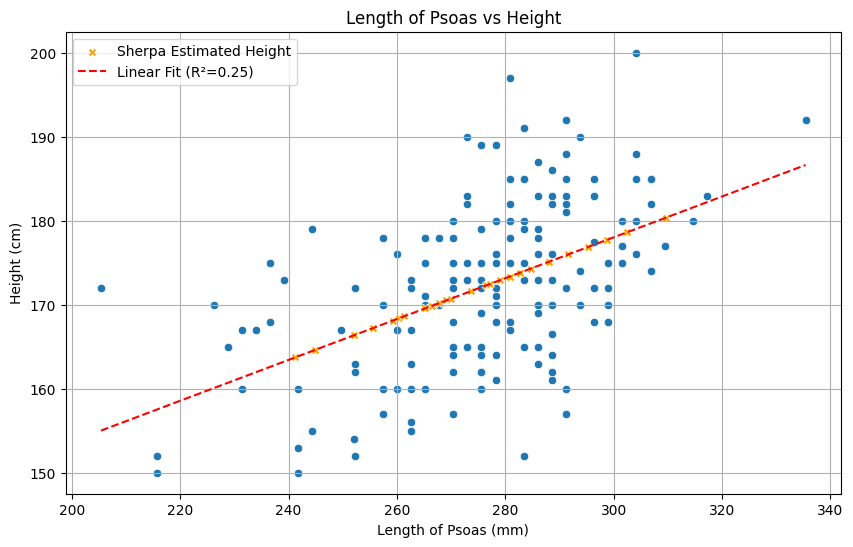

In [72]:
# Plot length of psoas vs height
# And fit a linear regression line
#
slope, intercept, r_value, p_value, std_err = stats.linregress(cto5k_pd['LENGTH_LPSOAS'], cto5k_pd['height_cm'])
x_vals = np.linspace(cto5k_pd['LENGTH_LPSOAS'].min(), cto5k_pd['LENGTH_LPSOAS'].max(), 100)
y_vals = slope * x_vals + intercept
filtered_data = filtered_data[filtered_data['LENGTH_LPSOAS'] >= 200]
print(filtered_data[['Code', 'LENGTH_LPSOAS']])
# Estimate Sherpa heights from their psoas length using the fitted regression model
filtered_data['Estimated_Height_from_Psoas'] = slope * filtered_data['LENGTH_LPSOAS'] + intercept

plt.figure(figsize=(10, 6))
sns.scatterplot(data=cto5k_pd, x='LENGTH_LPSOAS', y='height_cm')
sns.scatterplot(x=filtered_data['LENGTH_LPSOAS'], y=filtered_data['Estimated_Height_from_Psoas'], marker='X', color='orange', label='Sherpa Estimated Height')
plt.title('Length of Psoas vs Height')
plt.xlabel('Length of Psoas (mm)')
plt.ylabel('Height (cm)')
plt.plot(x_vals, y_vals, color='red', linestyle='--', label=f'Linear Fit (R²={r_value**2:.2f})')
plt.legend()
plt.grid()
plt.show()

In [73]:
# Compute demographics:
# Compute mean (SD) for age, BMI, years post-transplant, and years of dialysis for each group
group_stats = filtered_data.groupby('Group').agg(
    Age_Mean=('Age', 'mean'),
    Age_SD=('Age', 'std'),
    Age_Min=('Age', 'min'),
    Age_Max=('Age', 'max'),
    BMI_Mean=('BMI', 'mean'),
    BMI_SD=('BMI', 'std'),
    BMI_Min=('BMI', 'min'),
    BMI_Max=('BMI', 'max'),
    #Years_Post_Transplant_Mean=('¿Cuánto tiempo hizo diálisis antes de su trasplante?\nSi no hizo diálisis, indiquelo con un 0', 'mean'),
    #Years_Post_Transplant_SD=('¿Cuánto tiempo hizo diálisis antes de su trasplante?\nSi no hizo diálisis, indiquelo con un 0', 'std'),
    #Years_Dialysis_Mean=('¿Hace cuanto tiempo que realiza diálisis?', 'mean'),
    #Years_Dialysis_SD=('¿Hace cuanto tiempo que realiza diálisis?', 'std'),
    Subject_Count=('Code', 'count')
    , Male_Count=('Sex', lambda x: (x == 'Male').sum()),
    Female_Count=('Sex', lambda x: (x == 'Female').sum()),
    Male_Percentage=('Sex', lambda x: (x == 'Male').mean() * 100),
    Female_Percentage=('Sex', lambda x: (x == 'Female').mean() * 100)
)

# Print the computed statistics
print(group_stats)

        Age_Mean    Age_SD  Age_Min  Age_Max       BMI_Mean        BMI_SD  \
Group                                                                       
Porter     36.15  8.325278     21.0     55.0  250012.174125  25959.116825   

              BMI_Min        BMI_Max  Subject_Count  Male_Count  Female_Count  \
Group                                                                           
Porter  213039.485767  320512.820513             40          39             1   

        Male_Percentage  Female_Percentage  
Group                                       
Porter             97.5                2.5  


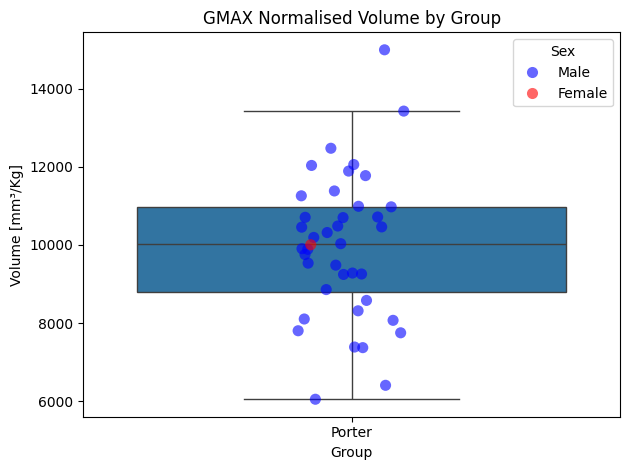

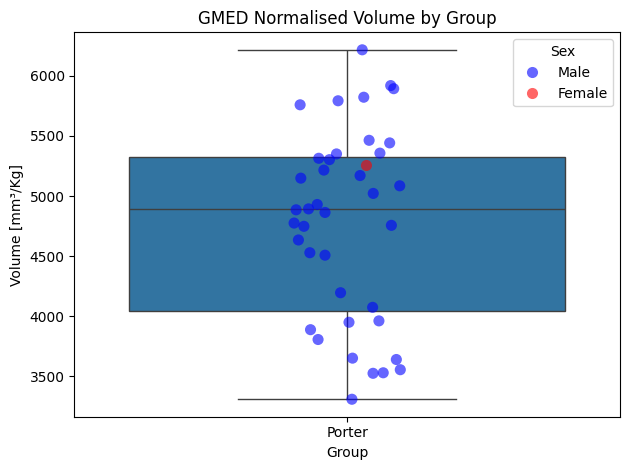

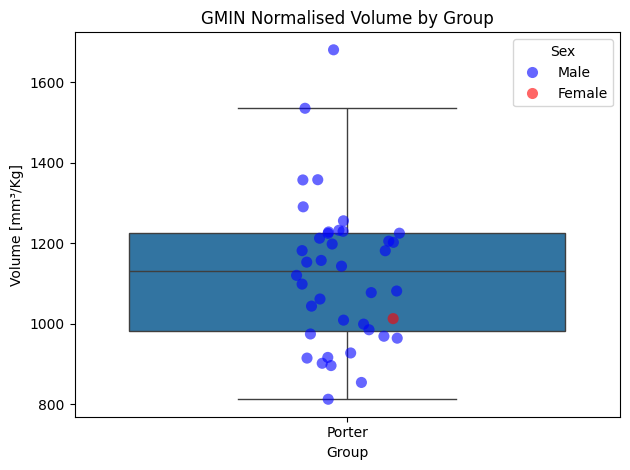

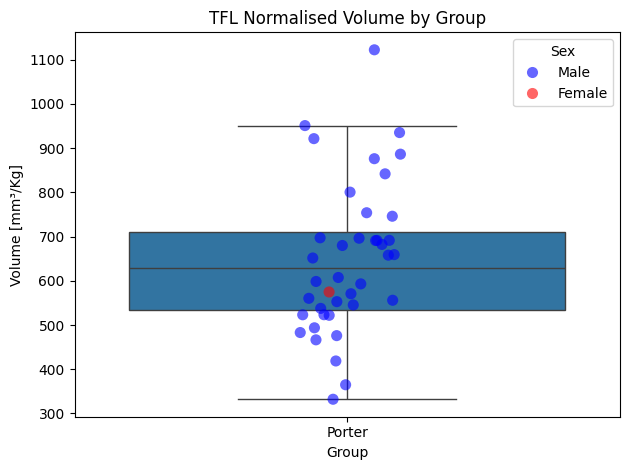

In [74]:
# Plot box plots for volume:

for muscle in ['GMAX', 'GMED', 'GMIN', 'TFL']:
    sns.boxplot(x='Group', y=f'NORM_VOL_{muscle}', data=filtered_data, showfliers=False)
    sns.stripplot(x='Group', y=f'NORM_VOL_{muscle}', data=filtered_data, hue='Sex', 
                  palette={'Male': 'blue', 'Female': 'red'}, alpha=0.6, jitter=True, size=8, 
                  marker='o' if filtered_data['Sex'].iloc[0] == 'Male' else 'X')
    plt.ylabel('Volume [mm³/Kg]')
    plt.title(f'{muscle} Normalised Volume by Group')
    #plt.ylim(0, 25)
    plt.tight_layout()
    plt.savefig(os.path.join(output_path, f"boxplot_norm_vol_{muscle}_by_group.png"))
    plt.show()
    plt.close()


In [75]:
# CREATE MELTED DATAFRAME WITH ALL MUSCLES AND VARIABLES
# Create dataframes for each variable
ff_cols = [f'FF_{muscle}' for muscle in muscles]
vol_cols = [f'VOL_{muscle}' for muscle in muscles]
nvol_cols = [f'NORM_VOL_{muscle}' for muscle in muscles]
lnvol_cols = [f'LEAN_NORM_VOL_{muscle}' for muscle in muscles]
nhvol_cols = [f'NORMH_VOL_{muscle}' for muscle in muscles]
lnhvol_cols = [f'LEAN_NORMH_VOL_{muscle}' for muscle in muscles]
nh2vol_cols = [f'NORMH2_VOL_{muscle}' for muscle in muscles]
lnh2vol_cols = [f'LEAN_NORMH2_VOL_{muscle}' for muscle in muscles]
ff_df = filtered_data[ff_cols].copy()
vol_df = filtered_data[vol_cols].copy()
nvol_df = filtered_data[nvol_cols].copy()
lnvol_df = filtered_data[lnvol_cols].copy()
nhvol_df = filtered_data[nhvol_cols].copy()#
lnhvol_df = filtered_data[lnhvol_cols].copy()
nh2vol_df = filtered_data[nh2vol_cols].copy()
lnh2vol_df = filtered_data[lnh2vol_cols].copy()


# now melt all dataframes and concatenate them
# now melt it
ff_melted = ff_df.melt(var_name='Muscle', value_name='FF')
ff_melted['Muscle'] = ff_melted['Muscle'].str.replace('FF_', '')
vol_melted = vol_df.melt(var_name='Muscle', value_name='VOL')
vol_melted['Muscle'] = vol_melted['Muscle'].str.replace('VOL_', '')
nvol_melted = nvol_df.melt(var_name='Muscle', value_name='NORM_VOL')
nvol_melted['Muscle'] = nvol_melted['Muscle'].str.replace('NORM_VOL_', '')
lnvol_melted = lnvol_df.melt(var_name='Muscle', value_name='LEAN_NORM_VOL')
lnvol_melted['Muscle'] = lnvol_melted['Muscle'].str.replace('LEAN_NORM_VOL_', '')
nhvol_melted = nhvol_df.melt(var_name='Muscle', value_name='NORMH_VOL')
nhvol_melted['Muscle'] = nhvol_melted['Muscle'].str.replace('NORMH_VOL_', '')
lnhvol_melted = lnhvol_df.melt(var_name='Muscle', value_name='LEAN_NORMH_VOL')
lnhvol_melted['Muscle'] = lnhvol_melted['Muscle'].str.replace('LEAN_NORMH_VOL_', '')
nh2vol_melted = nh2vol_df.melt(var_name='Muscle', value_name='NORMH2_VOL')
nh2vol_melted['Muscle'] = nh2vol_melted['Muscle'].str.replace('NORMH2_VOL_', '')
lnh2vol_melted = lnh2vol_df.melt(var_name='Muscle', value_name='LEAN_NORMH2_VOL')
lnh2vol_melted['Muscle'] = lnh2vol_melted['Muscle'].str.replace('LEAN_NORMH2_VOL_', '')
# Concatenate all melted dataframes
all_melted = pd.concat([ff_melted, vol_melted['VOL'], nvol_melted['NORM_VOL'], lnvol_melted['LEAN_NORM_VOL'],
                        nhvol_melted['NORMH_VOL'], lnhvol_melted['LEAN_NORMH_VOL'],
                        nh2vol_melted['NORMH2_VOL'], lnh2vol_melted['LEAN_NORMH2_VOL']], axis=1)

# Repeat sex and group info to match melted data
n = len(muscles) # Number of times to repeat each row (e.g., number of muscles)
repeated_info = pd.concat([filtered_data[['Sex', 'Group']]] * n, ignore_index=True)
all_melted[['Sex', 'Group']] = repeated_info
all_melted.to_csv(os.path.join(output_path, "ff_melted_by_muscle_and_group.csv"), index=False)


C:\Users\marti\AppData\Local\Temp\ipykernel_11056\2861300910.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Muscle', y=var, data=df, showfliers=False, palette='Set2', ax=ax)
C:\Users\marti\AppData\Local\Temp\ipykernel_11056\2861300910.py:22: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([f"{m}\nPorter" for m in muscle_order])


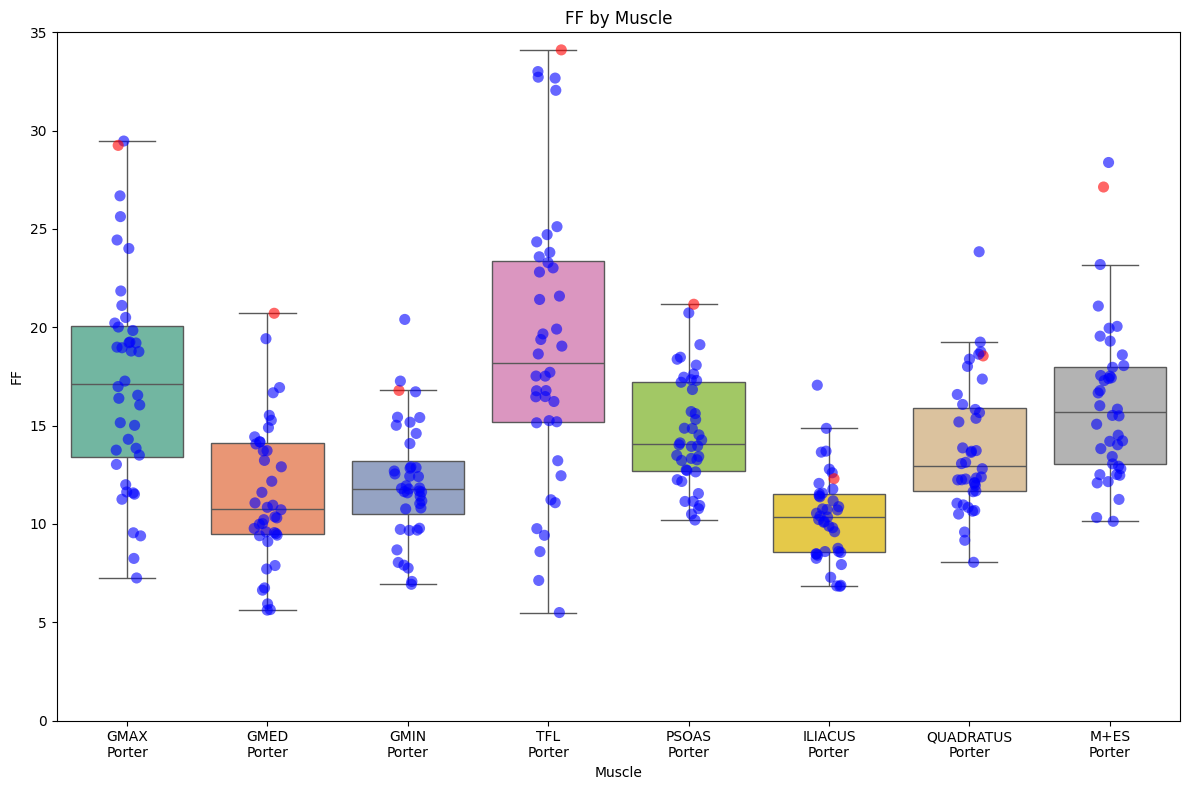

C:\Users\marti\AppData\Local\Temp\ipykernel_11056\2861300910.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Muscle', y=var, data=df, showfliers=False, palette='Set2', ax=ax)
C:\Users\marti\AppData\Local\Temp\ipykernel_11056\2861300910.py:22: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([f"{m}\nPorter" for m in muscle_order])


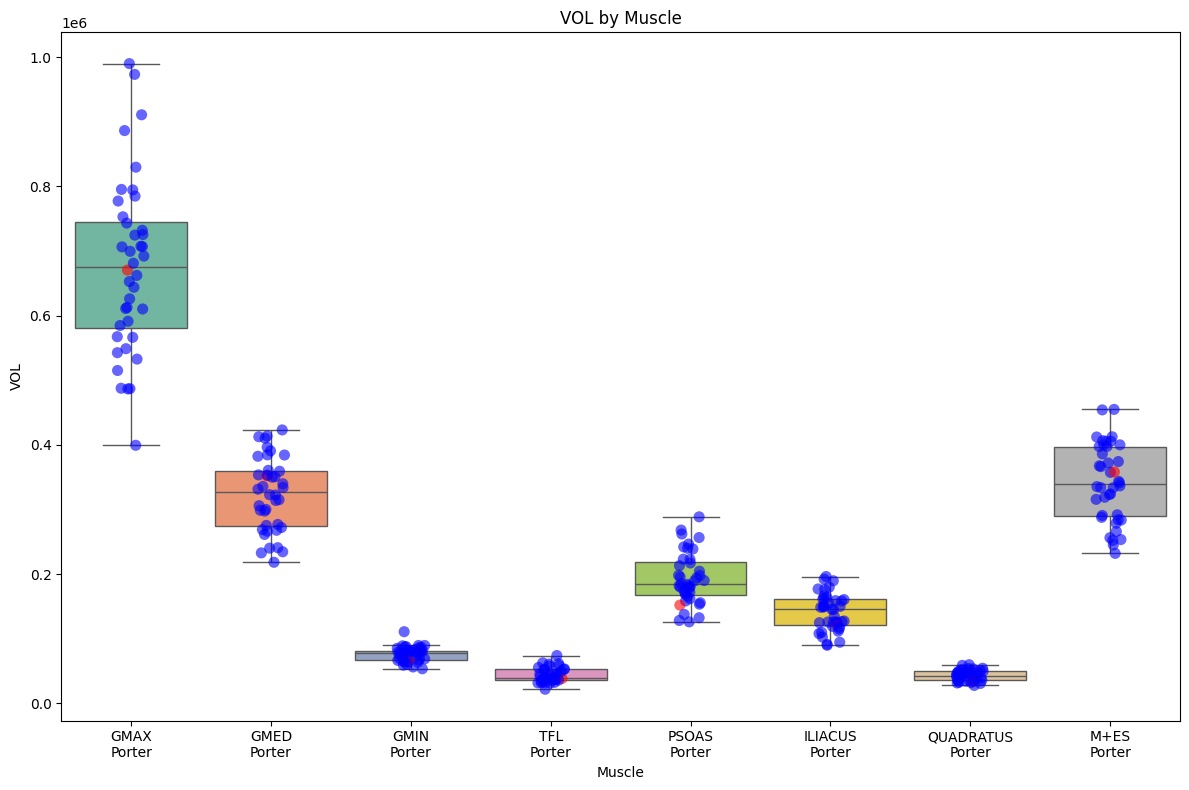

C:\Users\marti\AppData\Local\Temp\ipykernel_11056\2861300910.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Muscle', y=var, data=df, showfliers=False, palette='Set2', ax=ax)
C:\Users\marti\AppData\Local\Temp\ipykernel_11056\2861300910.py:22: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([f"{m}\nPorter" for m in muscle_order])


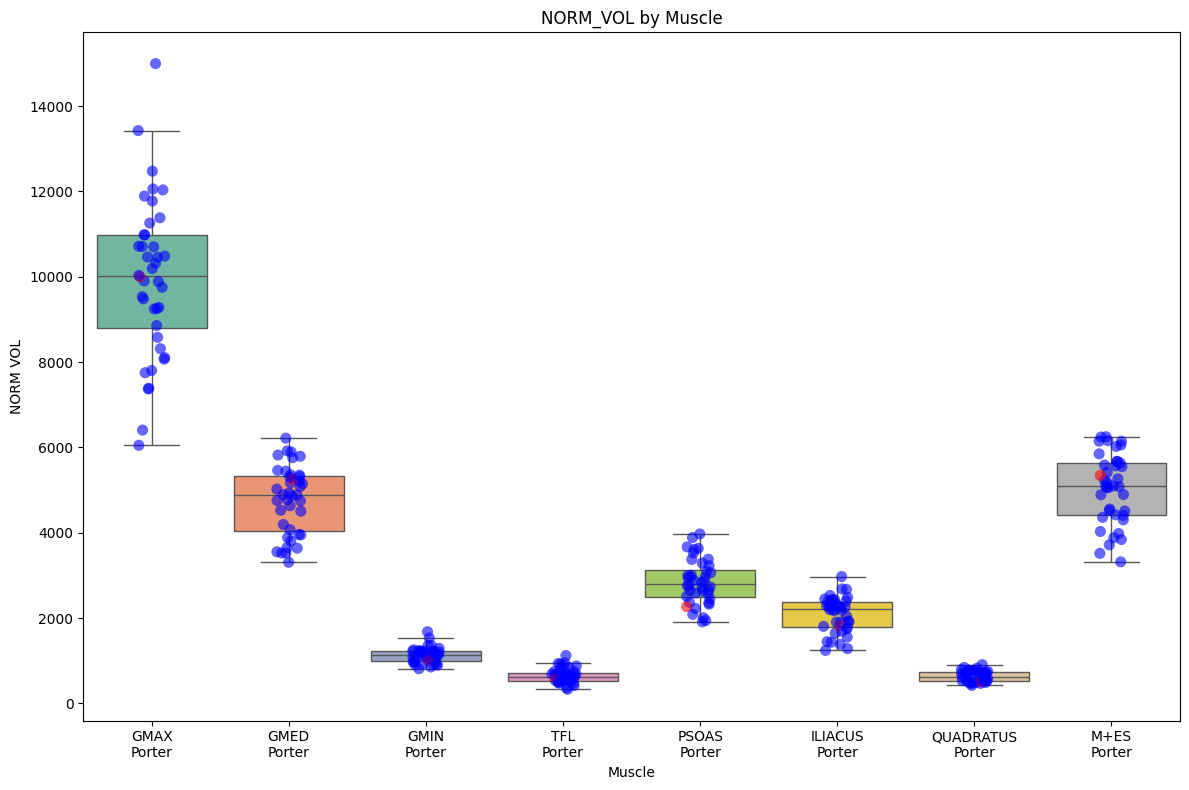

C:\Users\marti\AppData\Local\Temp\ipykernel_11056\2861300910.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Muscle', y=var, data=df, showfliers=False, palette='Set2', ax=ax)
C:\Users\marti\AppData\Local\Temp\ipykernel_11056\2861300910.py:22: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([f"{m}\nPorter" for m in muscle_order])


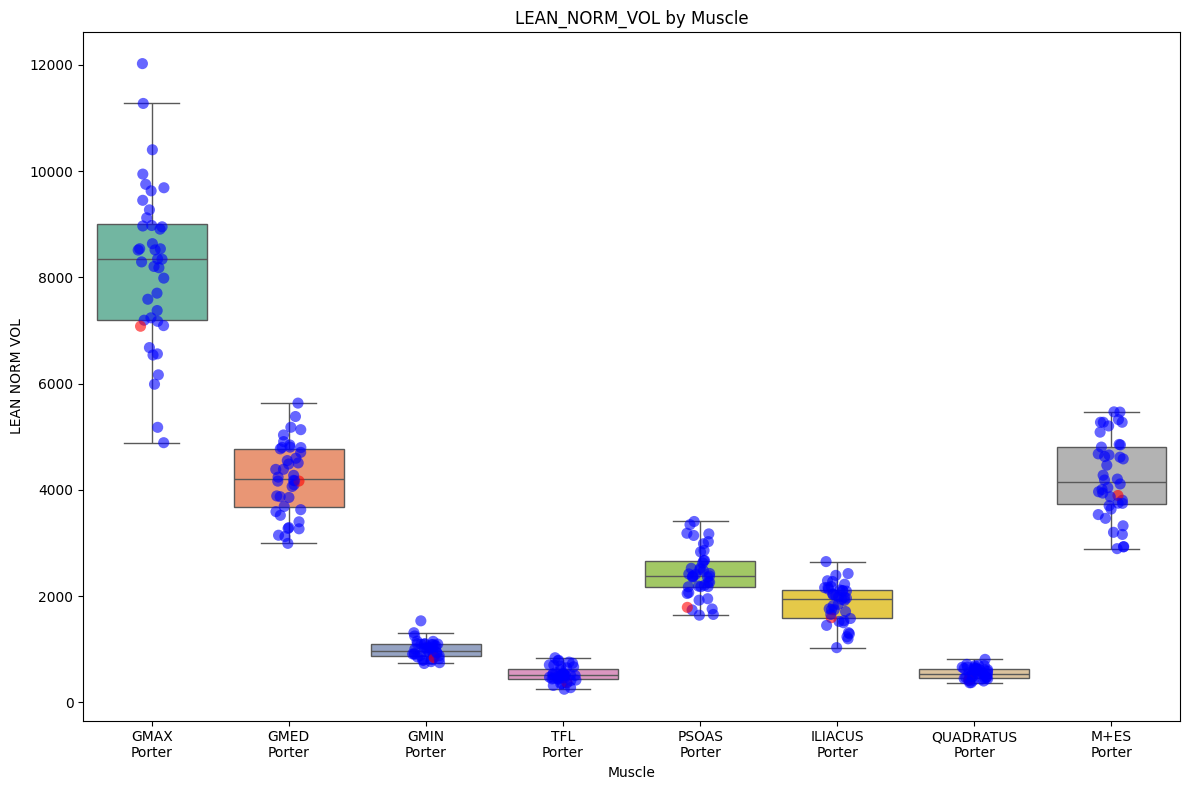

C:\Users\marti\AppData\Local\Temp\ipykernel_11056\2861300910.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Muscle', y=var, data=df, showfliers=False, palette='Set2', ax=ax)
C:\Users\marti\AppData\Local\Temp\ipykernel_11056\2861300910.py:22: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([f"{m}\nPorter" for m in muscle_order])


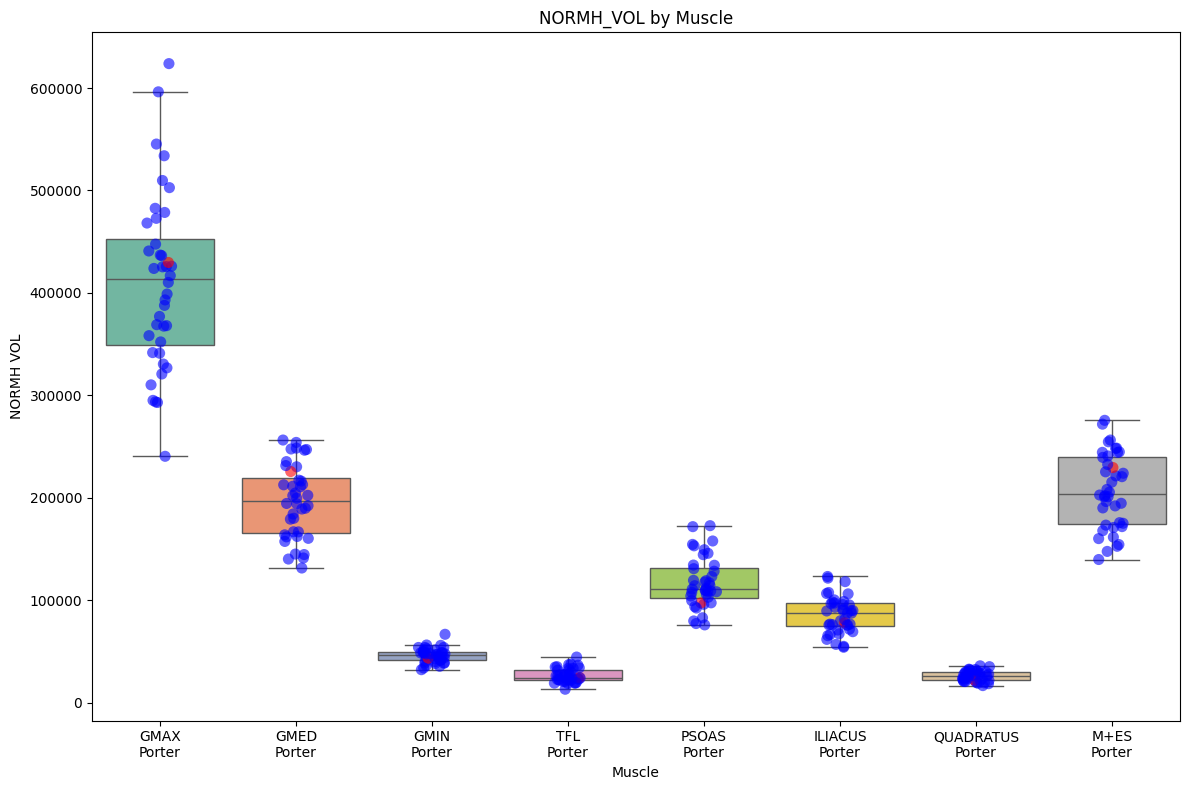

C:\Users\marti\AppData\Local\Temp\ipykernel_11056\2861300910.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Muscle', y=var, data=df, showfliers=False, palette='Set2', ax=ax)
C:\Users\marti\AppData\Local\Temp\ipykernel_11056\2861300910.py:22: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([f"{m}\nPorter" for m in muscle_order])


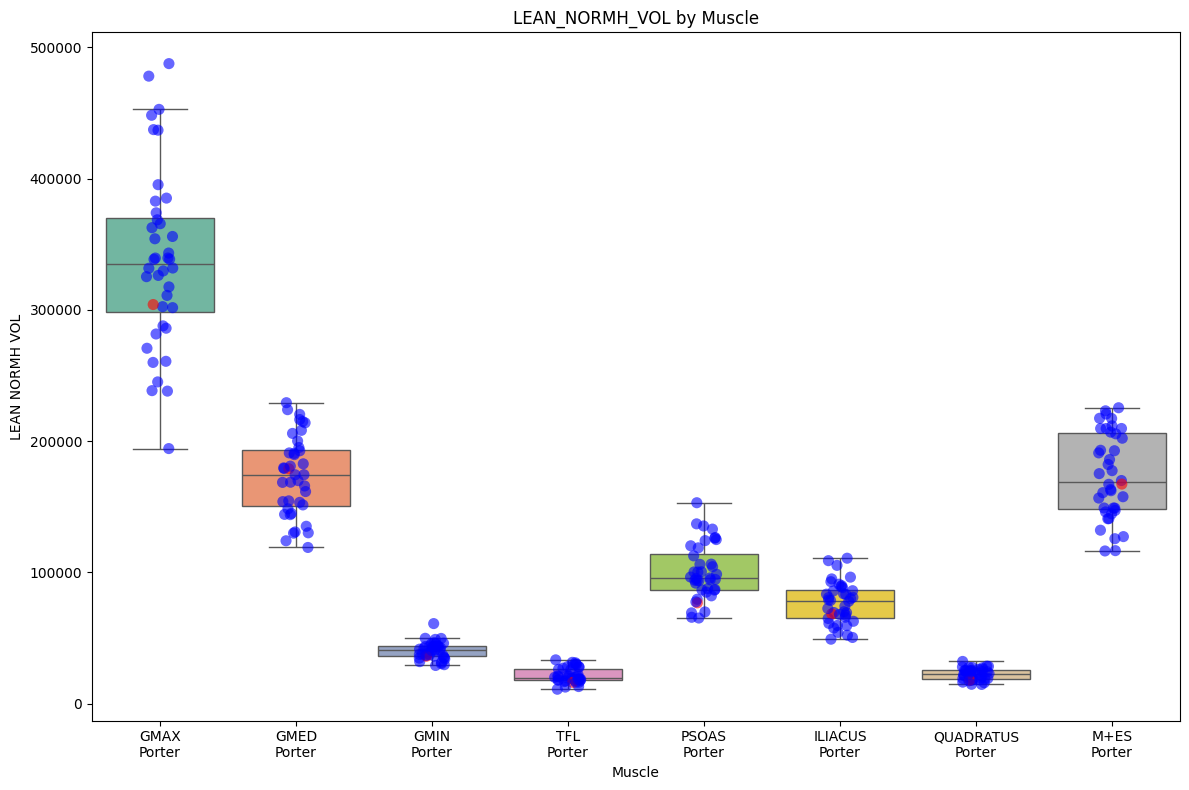

C:\Users\marti\AppData\Local\Temp\ipykernel_11056\2861300910.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Muscle', y=var, data=df, showfliers=False, palette='Set2', ax=ax)
C:\Users\marti\AppData\Local\Temp\ipykernel_11056\2861300910.py:22: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([f"{m}\nPorter" for m in muscle_order])


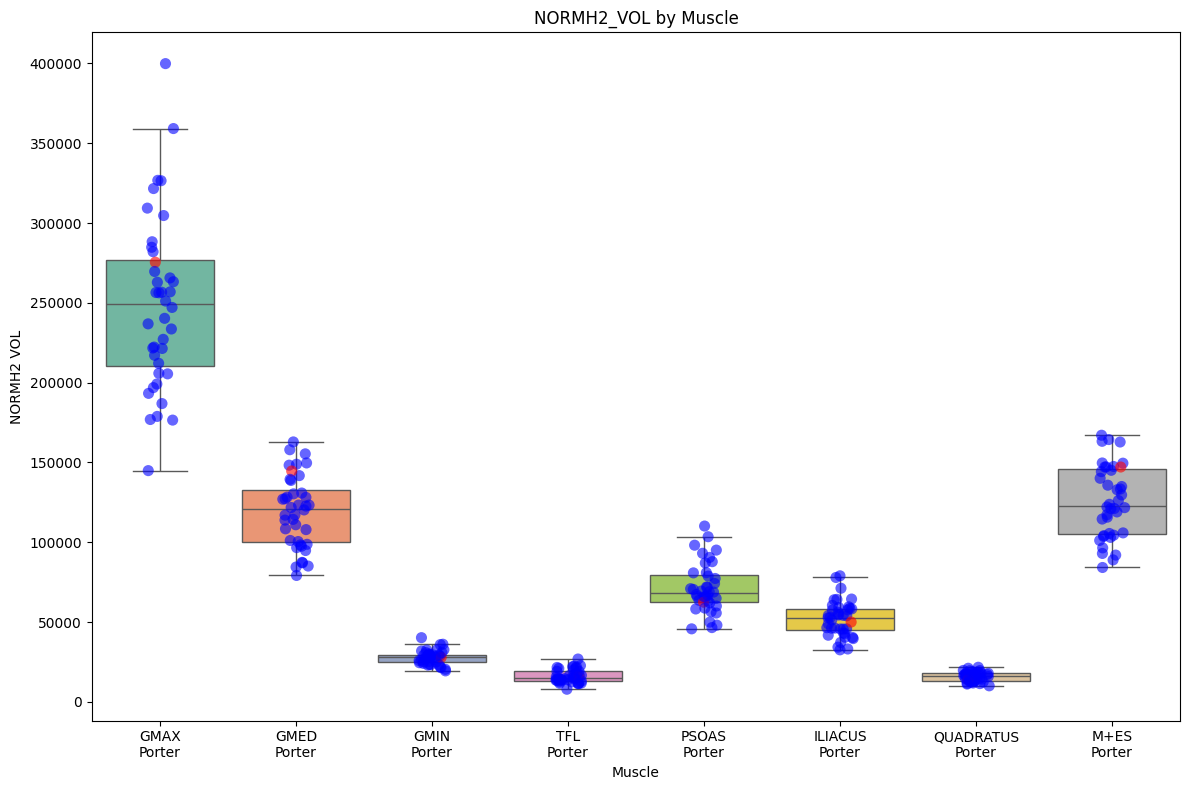

C:\Users\marti\AppData\Local\Temp\ipykernel_11056\2861300910.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Muscle', y=var, data=df, showfliers=False, palette='Set2', ax=ax)
C:\Users\marti\AppData\Local\Temp\ipykernel_11056\2861300910.py:22: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([f"{m}\nPorter" for m in muscle_order])


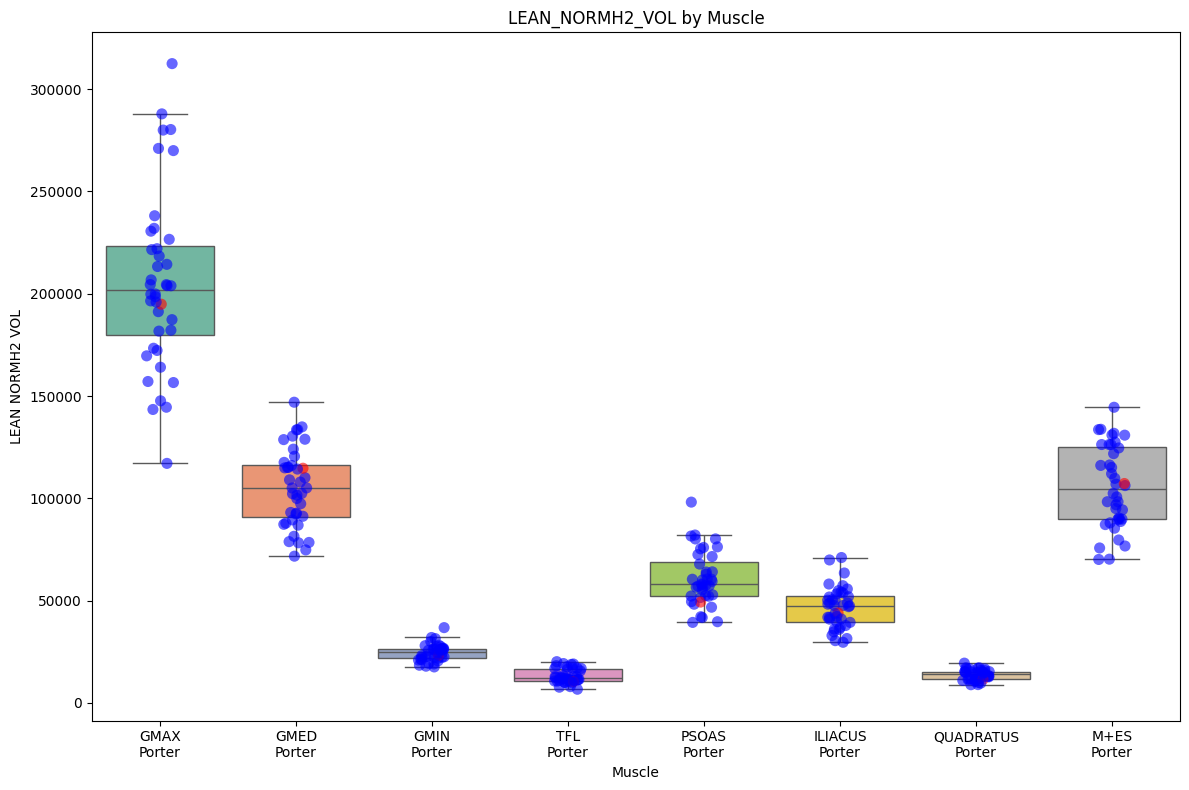

C:\Users\marti\AppData\Local\Temp\ipykernel_11056\2861300910.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Muscle', y='FF', data=all_melted, showfliers=False, palette='Set2')


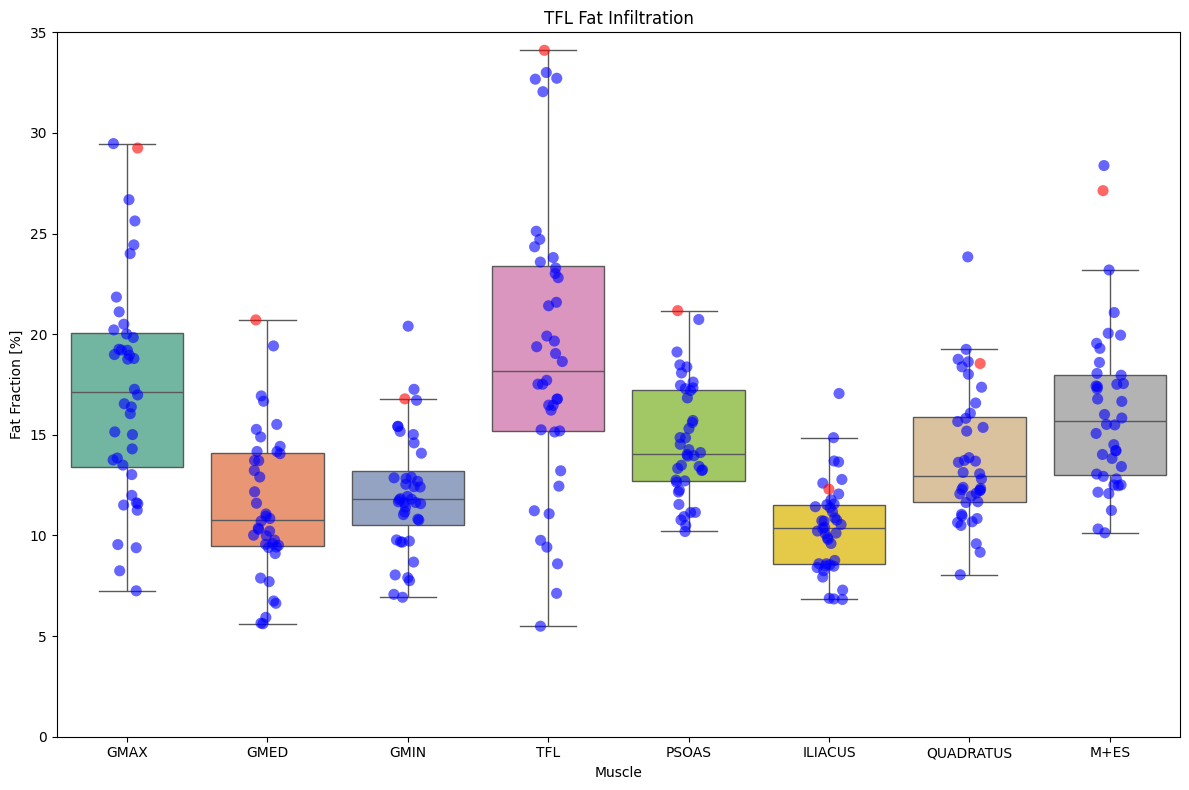

In [76]:

variables = ['FF', 'VOL', 'NORM_VOL', 'LEAN_NORM_VOL', 'NORMH_VOL', 'LEAN_NORMH_VOL', 'NORMH2_VOL', 'LEAN_NORMH2_VOL']
melted_dfs = {
    'FF': all_melted[['Muscle', 'FF', 'Sex', 'Group']],
    'VOL': vol_melted.join(repeated_info),
    'NORM_VOL': nvol_melted.join(repeated_info),
    'LEAN_NORM_VOL': lnvol_melted.join(repeated_info),
    'NORMH_VOL': nhvol_melted.join(repeated_info),
    'LEAN_NORMH_VOL': lnhvol_melted.join(repeated_info),
    'NORMH2_VOL': nh2vol_melted.join(repeated_info),
    'LEAN_NORMH2_VOL': lnh2vol_melted.join(repeated_info)
}
muscle_order = muscles
for var in variables:
    df = melted_dfs[var]
    fig, ax = plt.subplots(figsize=(12, 8))
    sns.boxplot(x='Muscle', y=var, data=df, showfliers=False, palette='Set2', ax=ax)
    sns.stripplot(x='Muscle', y=var, data=df, hue='Sex',
                  palette={'Male': 'blue', 'Female': 'red'}, alpha=0.6, jitter=True, size=8,
                  marker='o' if filtered_data['Sex'].iloc[0] == 'Male' else 'X', dodge=False, ax=ax)
    ax.set_ylabel(var.replace('_', ' '))
    ax.set_title(f'{var} by Muscle')
    ax.set_xticklabels([f"{m}\nPorter" for m in muscle_order])
    if var == 'FF':
        ax.set_ylim(0, 35)
    if ax.get_legend():
        ax.get_legend().remove()
    plt.tight_layout()
    plt.savefig(os.path.join(output_path, f"boxplot_{var.lower()}_all_muscles_by_group.png"))
    plt.show()
# Plot box plots for fat fraction:
fig, ax = plt.subplots(figsize=(12, 8))
sns.boxplot(x='Muscle', y='FF', data=all_melted, showfliers=False, palette='Set2')
sns.stripplot(x='Muscle', y='FF', data=all_melted, hue='Sex',
                palette={'Male': 'blue', 'Female': 'red'}, alpha=0.6, jitter=True, size=8,
                marker='o' if filtered_data['Sex'].iloc[0] == 'Male' else 'X', dodge=False)
ax.set_ylabel('Fat Fraction [%]')
ax.set_title(f'{muscle} Fat Infiltration')
ax.set_ylim(0, 35)
if i == 0:
    ax.legend(title='Sex')
else:
    ax.get_legend().remove()
plt.tight_layout()
plt.savefig(os.path.join(output_path, "boxplot_ff_all_muscles_by_group.png"))
plt.show()



In [ ]:
# Merge cto5k_pd and filtered_data for TFL muscle, renaming cto5k_pd columns to match Sherpa columns

# Prepare cto5k_pd subset for TFL
cto5k_pd_tfl = cto5k_pd[['age_years', 'group', 'TFL', 'sex']].copy()
cto5k_pd_tfl.rename(columns={
    'age_years': 'Age',
    'group': 'Group',
    'TFL': 'FF_TFL',
    'sex': 'Sex'
}, inplace=True)

# Prepare filtered_data subset for TFL
sherpa_tfl = filtered_data[['Age', 'Group', 'FF_TFL', 'Sex']].copy()

# Concatenate both dataframes
merged_tfl = pd.concat([cto5k_pd_tfl, sherpa_tfl], ignore_index=True)

print(merged_tfl.head())

C:\Users\marti\AppData\Local\Temp\ipykernel_11056\3947650978.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='group', y=variable, data=cto5k_pd, showfliers=False, palette='Set2')
C:\Users\marti\AppData\Local\Temp\ipykernel_11056\3947650978.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='group', y=variable, data=cto5k_pd, showfliers=False, palette='Set2')
C:\Users\marti\AppData\Local\Temp\ipykernel_11056\3947650978.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='group', y=variable, data=cto5k_pd, showfliers=False, palette=

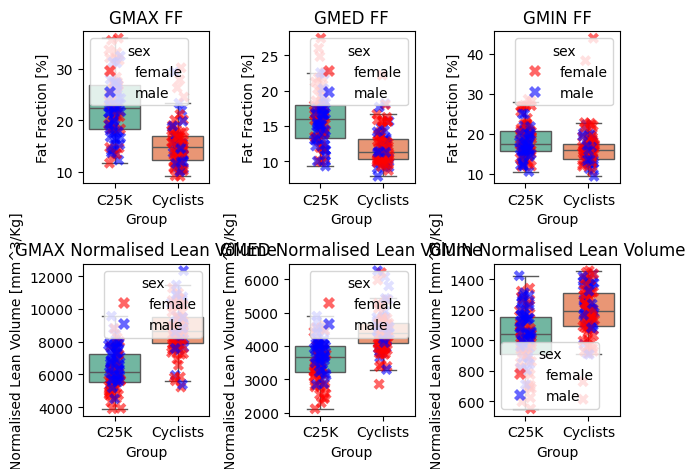

In [77]:

# Plot violin plots with individual dots for each variable
for i, variable in enumerate(variables_to_plot, 1):
    plt.subplot(2, 3, i)  # Create a subplot grid
    #sns.violinplot(x='group', y=variable, data=cto5k_pd_copy, palette='muted', inner=None, hue='group', split=False)
    sns.boxplot(x='group', y=variable, data=cto5k_pd, showfliers=False, palette='Set2')
    sns.stripplot(x='group', y=variable, data=cto5k_pd, hue='sex', 
                  palette={'male': 'blue', 'female': 'red'}, alpha=0.6, jitter=True, size=8, 
                  marker='o' if cto5k_pd['sex'].iloc[0] == 'male' else 'X')
    #sns.stripplot(x='group', y=variable, data=cto5k_pd_copy, color='black', alpha=0.6, jitter=True)
    #sns.violinplot(x='Group', y='FF_GMAX', data=filtered_data, palette='muted', inner=None)
    plt.title(f'{variables_names_for_titles[variable]}')
    plt.xlabel('Group')
    plt.ylabel(f'{ylabel_names[variable]}')

# Adjust layout and show the plots
plt.tight_layout()
plt.savefig(output_path + "violin_plots_core_score_group.png")
plt.show()

      Age   Group  Fat Fraction     Sex
0    26.0    C25K     13.304635  Female
1    42.0    C25K     22.599716  Female
2    25.0    C25K     17.428302    Male
3    39.0    C25K     18.752408  Female
4    60.0    C25K     22.425324  Female
..    ...     ...           ...     ...
204  42.0  Porter     19.212804    Male
205  41.0  Porter     20.498231    Male
206  36.0  Porter     16.387636    Male
207  41.0  Porter     17.263079    Male
208  34.0  Porter     21.845674    Male

[209 rows x 4 columns]
Muscle: GMAX, R²: 0.08, Slope: 0.1396, R: 0.2747, Error? 0.0378


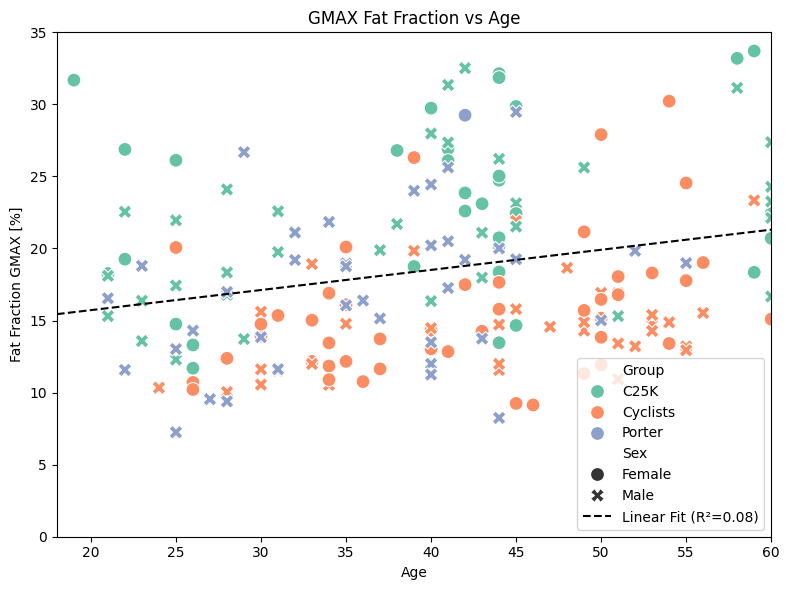

      Age   Group  Fat Fraction     Sex
0    26.0    C25K     10.377854  Female
1    42.0    C25K     14.482606  Female
2    25.0    C25K     13.008162    Male
3    39.0    C25K     13.199588  Female
4    60.0    C25K     13.846730  Female
..    ...     ...           ...     ...
204  42.0  Porter     12.168880    Male
205  41.0  Porter     11.067323    Male
206  36.0  Porter     10.014058    Male
207  41.0  Porter      9.979062    Male
208  34.0  Porter     15.519048    Male

[209 rows x 4 columns]
Muscle: GMED, R²: 0.13, Slope: 0.1108, R: 0.3650, Error? 0.0219


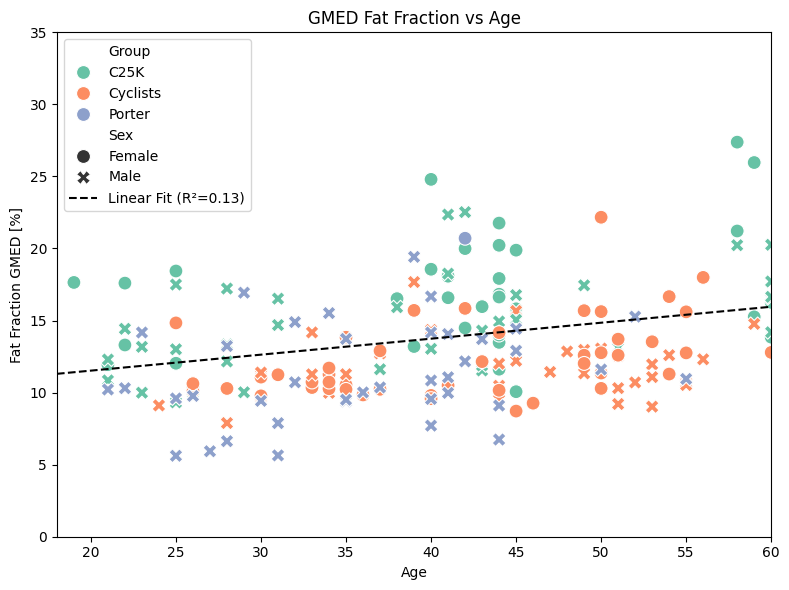

      Age   Group  Fat Fraction     Sex
0    26.0    C25K     15.714416  Female
1    42.0    C25K     18.640126  Female
2    25.0    C25K     15.961250    Male
3    39.0    C25K     14.461756  Female
4    60.0    C25K     21.610259  Female
..    ...     ...           ...     ...
204  42.0  Porter     12.425009    Male
205  41.0  Porter      9.720337    Male
206  36.0  Porter     10.763146    Male
207  41.0  Porter     14.087141    Male
208  34.0  Porter     12.540907    Male

[209 rows x 4 columns]
Muscle: GMIN, R²: 0.18, Slope: 0.1600, R: 0.4258, Error? 0.0263


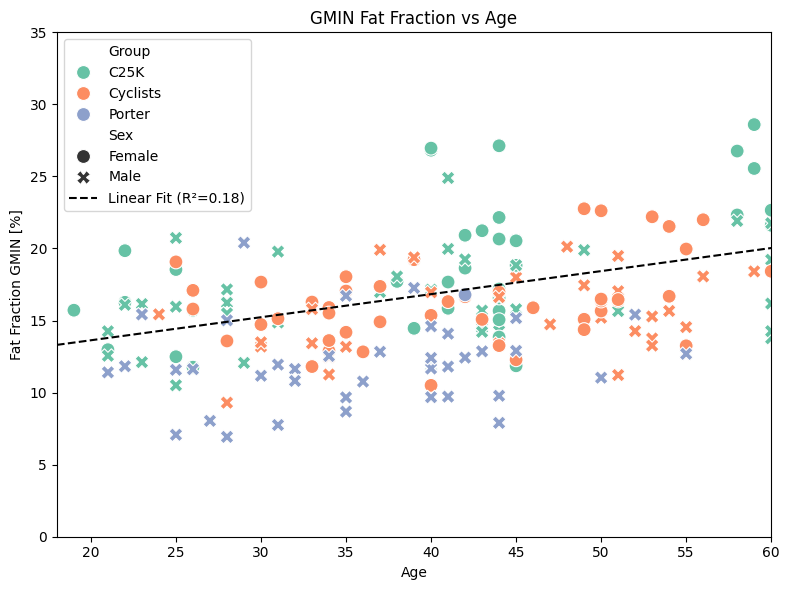

      Age   Group  Fat Fraction     Sex
0    26.0    C25K     12.051020  Female
1    42.0    C25K     20.117729  Female
2    25.0    C25K     15.141857    Male
3    39.0    C25K     21.083640  Female
4    60.0    C25K     17.745020  Female
..    ...     ...           ...     ...
204  42.0  Porter     13.213404    Male
205  41.0  Porter     23.585066    Male
206  36.0  Porter     25.116653    Male
207  41.0  Porter     19.908047    Male
208  34.0  Porter     23.291202    Male

[209 rows x 4 columns]
Muscle: TFL, R²: 0.07, Slope: 0.1082, R: 0.2598, Error? 0.0311


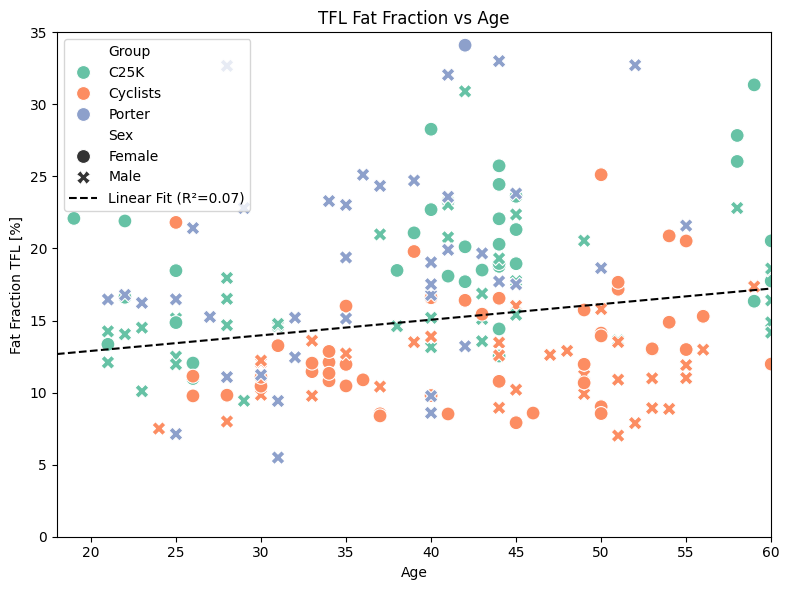

In [78]:
variables_to_plot = ['GMAX', 'GMED', 'GMIN','TFL']
cto5k_pd['sex'] = cto5k_pd['sex'].replace({'male': 'Male', 'female': 'Female'})
for variable in variables_to_plot:
    # Concatenate the two dataframes and keep only three columns
    concatenated_table = pd.concat([
        cto5k_pd[['age_years', 'group', f'{variable}', 'sex']].rename(columns={'age_years': 'Age', 'group': 'Group', f'{variable}': 'Fat Fraction', 'sex': 'Sex'}),
        filtered_data[['Age', 'Group', f'FF_{variable}', 'Sex']].rename(columns={f'FF_{variable}': 'Fat Fraction'})
    ], ignore_index=True)
    print(concatenated_table)
    # Fit a linear regression model
    slope, intercept, r_value, p_value, std_err = stats.linregress(cto5k_pd['age_years'], cto5k_pd[f'{variable}'])
    # Add the regression line to the plot
    x_vals = np.linspace(18, filtered_data['Age'].max()+5, 100)
    y_vals = slope * x_vals + intercept
    print(f"Muscle: {variable}, R²: {r_value**2:.2f}, Slope: {slope:.4f}, R: {r_value:.4f}, Error? {std_err:.4f}")
   # print(x_vals)
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x='Age', y=f'Fat Fraction', data=concatenated_table, hue='Group', style='Sex', palette='Set2', s=100)
    #sns.scatterplot(x='Age', y=f'FF_{variable}', data=filtered_data, hue='Group', style='Sex', palette='Set1', s=100)
    plt.plot(x_vals, y_vals, color='black', linestyle='--', label=f'Linear Fit (R²={r_value**2:.2f})')
    plt.xlabel('Age')
    plt.ylabel(f'Fat Fraction {variable} [%]')
    plt.xlim(18, filtered_data['Age'].max()+5)
    plt.ylim(0, 35)
    plt.legend()
    plt.title(f'{variable} Fat Fraction vs Age')
    plt.tight_layout()
    plt.savefig(os.path.join(output_path, f"scatter_ff_{variable}_vs_age.png"))
    plt.show()

C:\Users\marti\AppData\Local\Temp\ipykernel_11056\2291546559.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Group', y=f'LEAN_NORM_VOL_{muscle}', data=filtered_data, showfliers=False, palette='Set2')


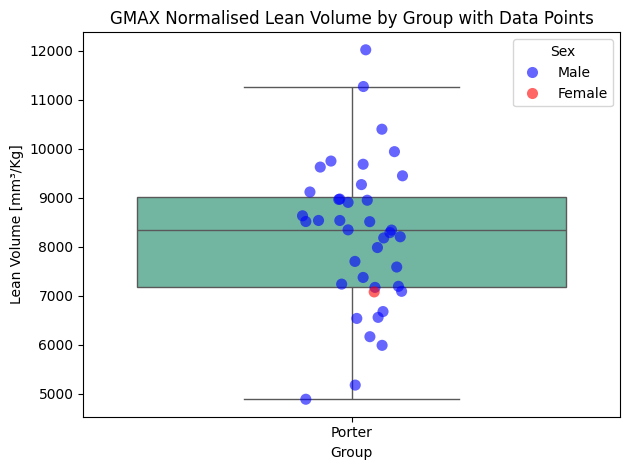

C:\Users\marti\AppData\Local\Temp\ipykernel_11056\2291546559.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Group', y=f'LEAN_NORM_VOL_{muscle}', data=filtered_data, showfliers=False, palette='Set2')


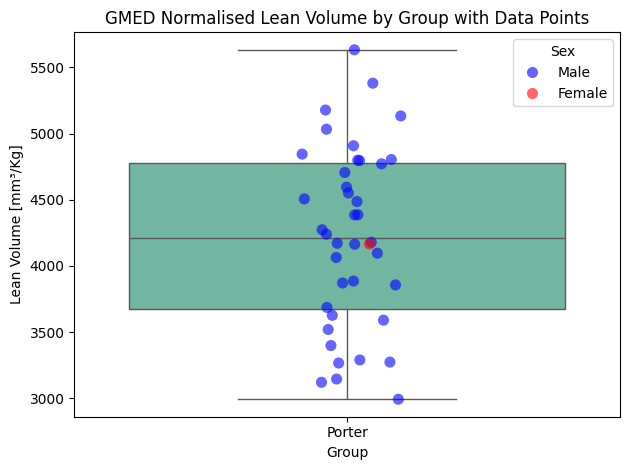

C:\Users\marti\AppData\Local\Temp\ipykernel_11056\2291546559.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Group', y=f'LEAN_NORM_VOL_{muscle}', data=filtered_data, showfliers=False, palette='Set2')


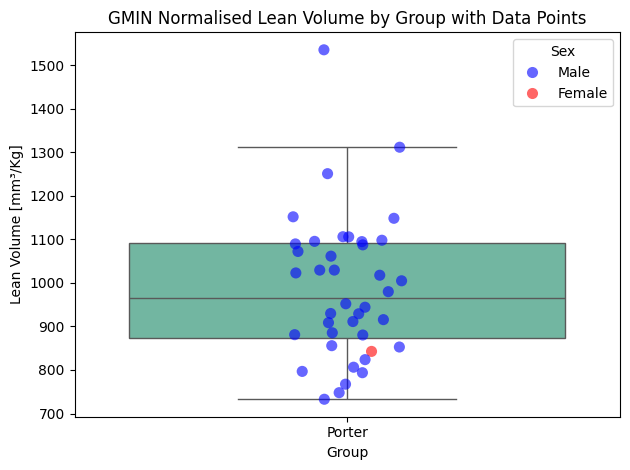

C:\Users\marti\AppData\Local\Temp\ipykernel_11056\2291546559.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Group', y=f'LEAN_NORM_VOL_{muscle}', data=filtered_data, showfliers=False, palette='Set2')


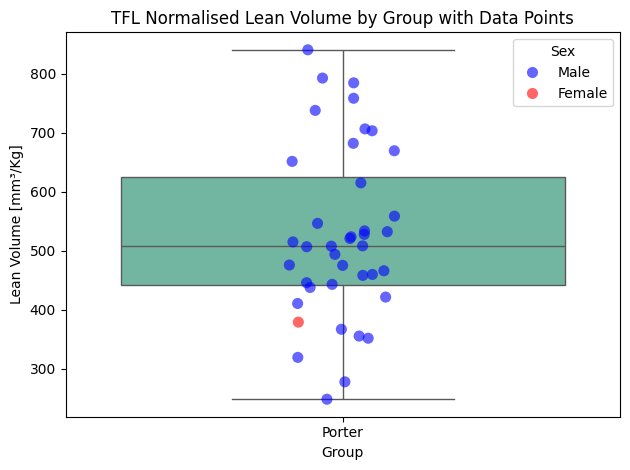

In [79]:
for muscle in ['GMAX', 'GMED', 'GMIN', 'TFL']:
    sns.boxplot(x='Group', y=f'LEAN_NORM_VOL_{muscle}', data=filtered_data, showfliers=False, palette='Set2')
    sns.stripplot(x='Group', y=f'LEAN_NORM_VOL_{muscle}', data=filtered_data, hue='Sex', 
                  palette={'Male': 'blue', 'Female': 'red'}, alpha=0.6, jitter=True, size=8, 
                  marker='o' if filtered_data['Sex'].iloc[0] == 'Male' else 'X')
    plt.ylabel('Lean Volume [mm³/Kg]')
    plt.title(f'{muscle} Normalised Lean Volume by Group with Data Points')
    #plt.ylim(0, 25)
    plt.tight_layout()
    plt.savefig(os.path.join(output_path, f"boxplot_lean_vol_{muscle}_by_group.png"))
    plt.show()
    plt.close()
